In [1]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV


import scipy.stats as stats

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.preprocessing import PolynomialFeatures


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


import warnings; warnings.simplefilter('ignore')


In [2]:
# Вынесем функции в предобработку.

def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()
    

def get_quantile(df, column):
    #вычисляем межквартильный размах:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

    #25-й перцентиль:
    perc25 = df[column].quantile(0.25)
    #75-й перцентиль:
    perc75 = df[column].quantile(0.75)

    #верхняя граница выбросов:
    l = perc75 + 1.5*iqr
    #нижняя граница выбросов:
    f = perc25 - 1.5*iqr

    print('Верхняя граница выбросов:',
          l, 'Нижняя граница выбросов:', f)
    print()
    #считаем количество выбросов
    print('Количество выбросов:', column, ':',
         df[df[column]<(perc25-1.5*iqr)][column].count() +
          df[df[column]>(perc75+1.5*iqr)][column].count())

def get_filling_mean(df, column):
    
    #вычисляем межквартильный размах:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

    #25-й перцентиль:
    perc25 = df[column].quantile(0.25)
    #75-й перцентиль:
    perc75 = df[column].quantile(0.75)

    #верхняя граница выбросов:
    l = perc75 + 1.5*iqr
    #нижняя граница выбросов:
    f = perc25 - 1.5*iqr
    #всё что выпадает за границы выбросов, заменяем на среднее
    df[column] = df[column].apply(lambda m: df[column].mean() if m < f else m)
    df[column] = df[column].apply(lambda m: df[column].mean() if m > l else m)
    
def get_filling_lim(df, column):
    
    #вычисляем межквартильный размах:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

    #25-й перцентиль:
    perc25 = df[column].quantile(0.25)
    #75-й перцентиль:
    perc75 = df[column].quantile(0.75)

    #верхняя граница выбросов:
    l = perc75 + 1.5*iqr
    #нижняя граница выбросов:
    f = perc25 - 1.5*iqr
    #всё что выпадает за границы выбросов, заменяем на среднее
    df[column] = df[column].apply(lambda m: perc25 if m < f else m)
    df[column] = df[column].apply(lambda m: perc75 if m > l else m)
    
def age_cat(x):
    
    if x <= 39:
        x = 1
    elif 39 < x < 53:
        x = 2
    else: x = 3
    return x

def region_cat(x):
    
    if x == 20:
        x = 1
    elif x == 30:
        x = 2
    elif x == 40:
        x = 3
    elif x == 50:
        x = 4
    elif x == 60:
        x = 5
    elif x == 70:
        x = 6
    else: x = 7
    return x

def income_cat(x):
    
    if x <= 20000:
        x = 1
    elif 20000 < x < 48000:
        x = 2
    else: x = 3
    return x

def metrics_1():
    
    Y_predicted = model.predict(X_test)
    print('Accuracy')
    print(accuracy_score(y_test,Y_predicted))
    print('Полнота')
    print(recall_score(y_test,Y_predicted))
    print('Точность')
    print(precision_score(y_test,Y_predicted))
    print('f1_score')
    print(f1_score(y_test,Y_predicted))
    print('roc_auc')
    print(roc_auc_score(y_test, probs))
    
def metrics_2():
    
    print('Accuracy')
    print(accuracy_score(Y_test,y_pred))
    print('Полнота')
    print(recall_score(Y_test,y_pred))
    print('Точность')
    print(precision_score(Y_test,y_pred))
    print('f1_score')
    print(f1_score(Y_test,y_pred))
    print('roc_auc')
    print(roc_auc_score(Y_test, probs))
    

def plots(a,b,c,d):
    fig, ax = plt.subplots(figsize=(10,7))
    plt.subplot(2, 2, 1)
    sns_plot = sns.distplot(df[a],bins = 20)
    plt.subplot(2, 2, 2)
    sns_plot = sns.distplot(df[b],bins = 20)
    plt.subplot(2, 2, 3)
    sns_plot = sns.distplot(df[c],bins = 20)
    plt.subplot(2, 2, 4)
    sns_plot = sns.distplot(df[d],bins = 20)
    plt.show()

def imp_num():
    imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
    imp_num.sort_values(inplace = True)
    imp_num.plot(kind = 'barh')

def imp_cat():
    imp_cat = Series(mutual_info_classif(df[cat_cols], df['default'], discrete_features =True), index = cat_cols)
    imp_cat.sort_values(inplace = True)
    imp_cat.plot(kind = 'barh')

def imp_bin():
    imp_bin = Series(mutual_info_classif(df[bin_cols], df['default'], discrete_features =True), index = bin_cols)
    imp_bin.sort_values(inplace = True)
    imp_bin.plot(kind = 'barh')

In [3]:
# Загружаем датасет и обьеденяем
  
df_train = pd.read_csv("train_kaggle.csv", encoding = 'ISO-8859-1', low_memory = False)
df_test = pd.read_csv("test_kaggle.csv", encoding = 'ISO-8859-1', low_memory = False)
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['default'] = 0 
df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [4]:
print('Целевой признак распределен неравномерно!!!')
df.default.value_counts()

Целевой признак распределен неравномерно!!!


0    100776
1      9372
Name: default, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [6]:
# Пропуски только в признаке education.
# Заменим пропуски на моду признака.
df.education.fillna('SCH', inplace = True)

<AxesSubplot:>

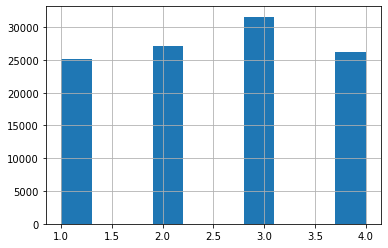

In [7]:
#Переведём дату подачи заявки в формат datetime
df['app_date'] = pd.to_datetime(df['app_date'])
#выделим номер месяца в отдельный столбец
df['month'] = df.app_date.apply(lambda s: s.month)
#df['day'] = df.app_date.apply(lambda s: s.day)
df.month.hist()

In [8]:
# Разделим некоторые числовые признаки на классы и создадим новые категориальные признаки.
df['age_cat'] = df.age.apply(age_cat)
df['region_cat'] = df['region_rating'].apply(region_cat) 
df['income_cat'] = df['income'].apply(income_cat)


In [9]:
# Бинарные переменные
bin_cols=['sex','car','car_type','good_work','foreign_passport']

# Категориальные переменные
cat_cols=['education','home_address','work_address','sna','first_time','age_cat','region_cat','income_cat']

# Числовые переменные
num_cols=['age', 'decline_app_cnt', 'income', 'bki_request_cnt',
         'score_bki', 'month','bki_request_many','bki_request_cnt_log','income_big']


In [10]:
df["income_big"] = (df.income >= 48000).astype(int)
df["bki_request_many"] = (df.bki_request_cnt >= 4).astype(int)
df["bki_request_cnt_log"] = df.bki_request_cnt.apply(lambda req: np.log(req + 2))

In [11]:
# Работа с выбросами не дала результата или привела к ухудшению модели.
# Было опробавана замена на средние и предельные значения.
# get_quantile(df, num_cols)

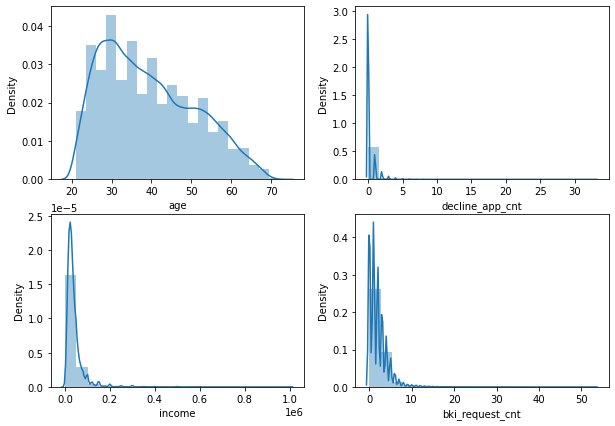

In [12]:
# Посмотрим на распределение числовых признаков.
plots('age','decline_app_cnt','income','bki_request_cnt')

In [13]:
# Прологарифмируем некоторые признаки.

df['bki_request_cnt_log'] = np.log(df['bki_request_cnt'] + 1)
df['decline_app_cnt_log'] = np.log(df['decline_app_cnt'] + 3)
df['income'] = np.log(df['income'])
df['age'] = np.log(df['age'])

log_cols = ['bki_request_cnt_log','decline_app_cnt_log']

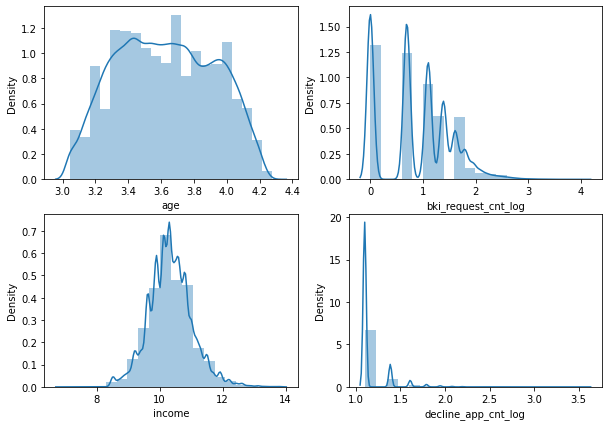

In [14]:
# Посмотрим на распределение прологарифмированых числовых признаков.
plots('age','bki_request_cnt_log','income','decline_app_cnt_log')   

<AxesSubplot:xlabel='default', ylabel='income'>

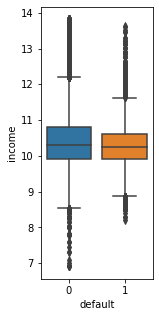

In [15]:
# Рассмотрим выбросы на боксплотах
fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot(x='default', y='income', data=df)

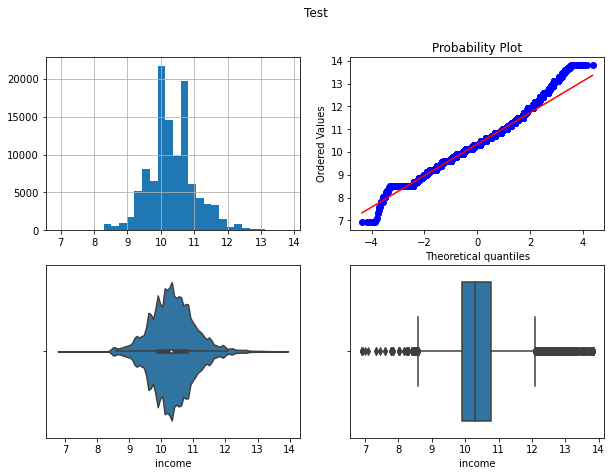

In [16]:
diagnostic_plots(df, 'income', 'Test')

In [17]:
# Работа с выбросами не дала результата или привела к ухудшению модели.
# Было опробавана замена на средние и предельные значения.
get_quantile(df, num_cols)

Верхняя граница выбросов: age                     4.576206
decline_app_cnt         0.000000
income                 12.092159
bki_request_cnt         7.500000
score_bki              -0.529070
month                   4.500000
bki_request_many        0.000000
bki_request_cnt_log     3.465736
income_big              2.500000
dtype: float64 Нижняя граница выбросов: age                    2.696192
decline_app_cnt        0.000000
income                 8.590284
bki_request_cnt       -4.500000
score_bki             -3.299252
month                  0.500000
bki_request_many       0.000000
bki_request_cnt_log   -2.079442
income_big            -1.500000
dtype: float64

Количество выбросов: ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki', 'month', 'bki_request_many', 'bki_request_cnt_log', 'income_big'] : age                        0
decline_app_cnt        18677
income                  2609
bki_request_cnt         2636
score_bki                518
month                      0
b

<AxesSubplot:>

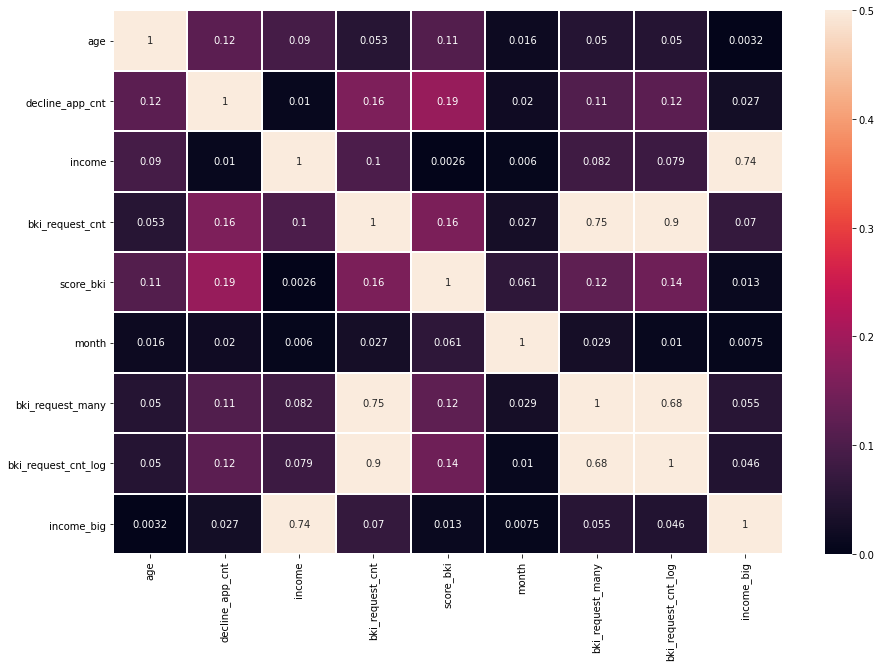

In [18]:
# Посмотрим на корелиции признаков
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=0.5, annot = True, linecolor = "white", linewidths = 1)

In [19]:
# Кодируем бинарные и категориальные признаки
label_encoder = LabelEncoder()
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])


label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])  

In [20]:
# После перебора и тестирования добавляем некоторые полиномиальные признаки
pf = PolynomialFeatures(2, include_bias=False)
poly_features = pf.fit_transform(df[['decline_app_cnt','foreign_passport','income']])
poly_df = pd.DataFrame(poly_features)

In [21]:
# Начнем создавать новые признаки в ручную, на основе уже имеющихся.
# И тестировать модель.
# Оставляем только улудшающие модель.

#df['age_sna'] = df['age'].map(df.groupby('age')['sna'].mean())
#df['mean_income_age'] = df['age'].map(df.groupby('age')['income'].mean())
#df['age_decline_app_cnt'] = df['age'].map(df.groupby('age')['decline_app_cnt'].mean())
#df['age_score_bki'] = df['age'].map(df.groupby('age')['score_bki'].mean())
#df['age_region_rating'] = df['age'].map(df.groupby('age')['region_rating'].mean())
#df['age_first_time'] = df['age'].map(df.groupby('age')['first_time'].mean())
#df['age_month'] = df['age'].map(df.groupby('age')['month'].mean())
#df['age_education'] = df['age'].map(df.groupby('age')['education'].mean())
#df['age_home_address'] = df['age'].map(df.groupby('age')['home_address'].mean())
#
#new_col = ['age_decline_app_cnt','age_score_bki','age_region_rating',
#           'age_month','age_first_time','age_region_rating',
#           'age_education','age_home_address']
#

In [22]:
# Стандартизируем новые признаки.
#X_new_col = StandardScaler().fit_transform(df[new_col].values)

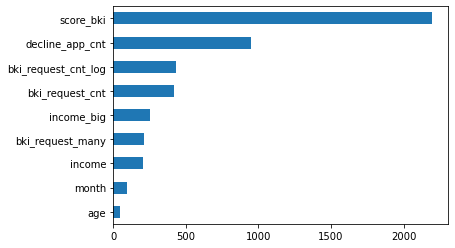

In [23]:
# Рассмотрим зависимости целевого признака от числовых признаков.
imp_num()

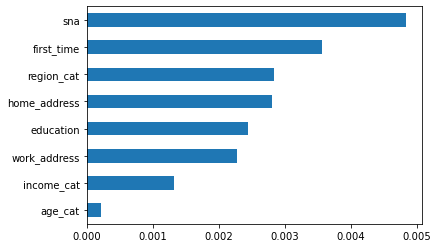

In [24]:
# Рассмотрим зависимости целевого признака от категориальных признаков.
imp_cat()

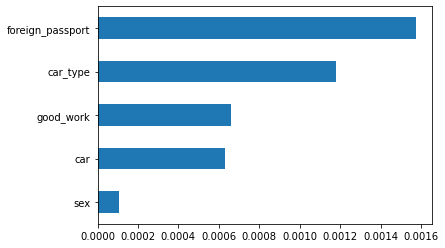

In [25]:
# Рассмотрим зависимости целевого признака от бинарных признаков.
imp_bin()

In [26]:
# Стандартизируем числовые признаки.
X_num = StandardScaler().fit_transform(df[num_cols].values)

In [27]:
# Соеденяем все признаки
X = np.hstack([X_num, df[bin_cols].values,df[cat_cols].values])

# Добавляем default и sample
X = pd.DataFrame(X)
X = pd.concat([df['sample'],df['default'],X], axis = 1)

# Разделяем по флагу sample
train_data = X.query('sample == 1').drop(['sample'], axis=1)
test_data = X.query('sample == 0').drop(['sample'], axis=1)

y = train_data.default.values            # наш таргет
x = train_data.drop(['default'], axis=1)


In [28]:
# Разделяем датафрейм.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
# Запускаем модель.
model = LogisticRegression(penalty = 'l2', C=250.0, solver = 'liblinear', class_weight = 'balanced', max_iter=111)

#model = AdaBoostClassifier(random_state = 42)
#model = GradientBoostingClassifier(loss= 'exponential',learning_rate = 0.1)
#model=KNeighborsClassifier(n_neighbors=10000)

model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)



fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

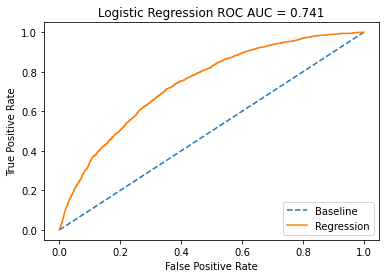

In [30]:
# Строим кривую roc_auc.
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


###### Кривая показывает неплохой результат но ниже на confusion_matrix видно, что наша модель не выдает кредит 
###### большому количеству людей, которые его бы вернули, что плохо и банк теряет деньги.
###### Хотя если бы речь шла о кредитах на большие суммы, то такая модель была бы возможно предпочтительней.
###### и снизила бы риски.
###### Но мы будем считать, что речь о небольших суммах и попытаемся улудшить модель.

<AxesSubplot:>

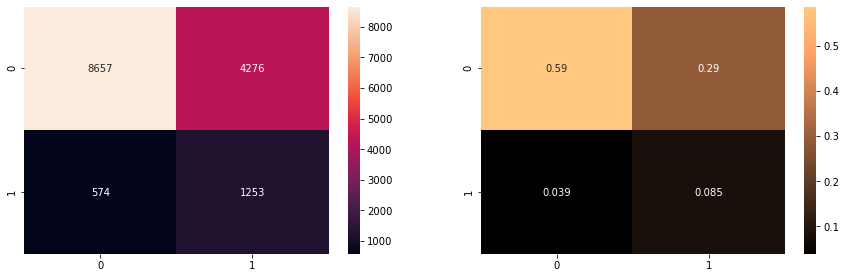

In [31]:
# Посмотрим на confusion_matrix.
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_norm = confusion_matrix(y_test, y_pred, model.classes_, normalize="all")

fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2, 2, 2)
sns.heatmap(cm_norm, annot=True,cmap='copper')
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt="d")

In [32]:
# Посмотрим на метрики
# Accuracy и Полнота показывают неплохой результат в модели, но precision и ф - мера проседают
# Видимо это связано с несбалансированой выборкой.
metrics_1()

Accuracy
0.6714092140921409
Полнота
0.685823754789272
Точность
0.22662325917887502
f1_score
0.3406742794997281
roc_auc
0.7408435399300788


# Строим новую модель

In [33]:
# Соеденяем все признаки
X = np.hstack([X_num, df[bin_cols].values,df[cat_cols].values,poly_df])

# Добавляем default и sample
X = pd.DataFrame(X)
X = pd.concat([df['sample'],df['default'],X], axis = 1)

# Разделяем по флагу sample
train_data = X.query('sample == 1').drop(['sample'], axis=1)
test_data = X.query('sample == 0').drop(['sample'], axis=1)

test_data.default.value_counts()

0    36349
Name: default, dtype: int64

In [34]:
# Балансируем выборку
df_0 = train_data[train_data.default == 0].iloc[:9372]
df_1 = train_data[train_data.default == 1].iloc[:9372]
train_data = pd.concat([df_1, df_0])
train_data.default.value_counts()

0    9372
1    9372
Name: default, dtype: int64

In [35]:
y = train_data.default.values           
x = train_data.drop(['default'], axis=1)

In [36]:
# Разделяем датафрейм.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [37]:
# Используем GridSearchCV, чтобы подобрать наилучшие параметры.
model = LogisticRegression(random_state=42)

# Задаем перечень параметров.
hyperparameters = {'C': np.linspace(0, 500, 5),
                  'max_iter': np.linspace(start=1,stop=500,num=10, dtype=int)}


# Применяем параметры к модели.
model = GridSearchCV(model, param_grid=hyperparameters, verbose=1, cv=2)
model.fit(X_train, Y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

fpr, tpr, threshold = roc_curve(Y_test, probs)
roc_auc = roc_auc_score(Y_test, probs)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [38]:
# Наилучшие параметры.
model.best_params_

{'C': 250.0, 'max_iter': 167}

In [39]:
# Список параметров модели.
model.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 42,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=42),
 'n_jobs': None,
 'param_grid': {'C': array([  0., 125., 250., 375., 500.]),
  'max_iter': array([  1,  56, 111, 167, 222, 278, 333, 389, 444, 500])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

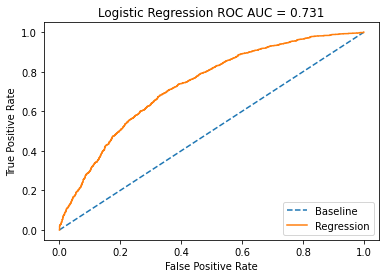

In [40]:
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [41]:
# Снова посмотрим на метрики.
# Ситуация сбалансировалась метрики показывают примерно одни значения.
metrics_2()

Accuracy
0.6748466257668712
Полнота
0.6751457339692634
Точность
0.6776595744680851
f1_score
0.6764003185558799
roc_auc
0.7311243131676568


<AxesSubplot:>

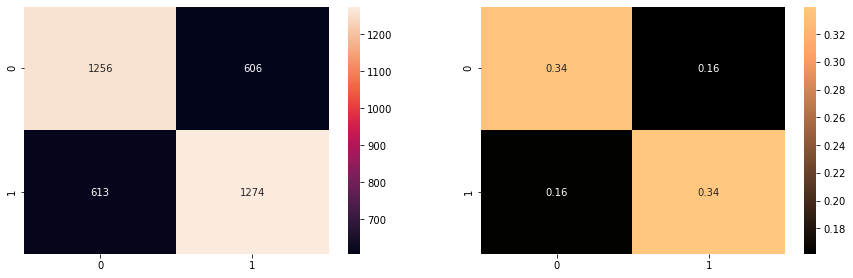

In [42]:
# Посмотрим на confusion_matrix 
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
cm_norm = confusion_matrix(Y_test, y_pred, model.classes_, normalize="all")

fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2, 2, 2)
sns.heatmap(cm_norm, annot=True,cmap='copper')
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt="d")

In [43]:
test_data.drop('default', axis = 1, inplace = True)

In [44]:
y_pred_sub = model.predict(test_data)
submission = pd.DataFrame({ 'client_id': df_test.client_id.values, 'default': y_pred_sub })
submission.to_csv("my_submission.csv", index=False)

NameError: name 'df_test' is not defined

In [ ]:
submission